# PyPI qqman GWAS plots  

Example using FTD frontotemporal dementia (TDP subtype) ieu-b-43 GWAS data from OpenGWAS Project

https://gwas.mrcieu.ac.uk/datasets/ieu-b-43/


#### Imports & setup

In [1]:
import os
import pandas as pd
from qqman import qqman
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input files
dir_gwas = '../data/gwas_plink'

plink_assoc = 'FTD_ieu-b-43.assoc'
plink_logistic = 'FTD_ieu-b-43.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_pypi_qqman'

#### setup variables

In [3]:
gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

<br>  

## plot PLINK --assoc output

In [4]:
!head {gwas_file_assoc}

CHR SNP BP A1 F_A F_U A2 CHISQ P OR
1 rs12562034 768448 A 0.0 0.0 G 0.0 0.8157999981570992 0.0256677
1 rs3934834 1005806 T 0.0 0.0 C 0.0 0.6307002454383797 0.0459289
1 rs9442372 1018704 G 0.0 0.0 A 0.0 0.11180005057183699 0.110373
1 rs6687776 1030565 T 0.0 0.0 C 0.0 0.028430205573239435 0.19721
1 rs776599533 1031540 G 0.0 0.0 A 0.0 0.4603000266093733 0.0573114
1 rs4970405 1048955 G 0.0 0.0 A 0.0 0.2082001317508879 0.13715
1 rs12726255 1049950 G 0.0 0.0 A 0.0 0.10839992956224856 0.152721
1 rs11807848 1061166 C 0.0 0.0 T 0.0 0.48170039229235834 0.0487902
1 rs9442373 1062638 A 0.0 0.0 C 0.0 0.8695000273511957 -0.0109399


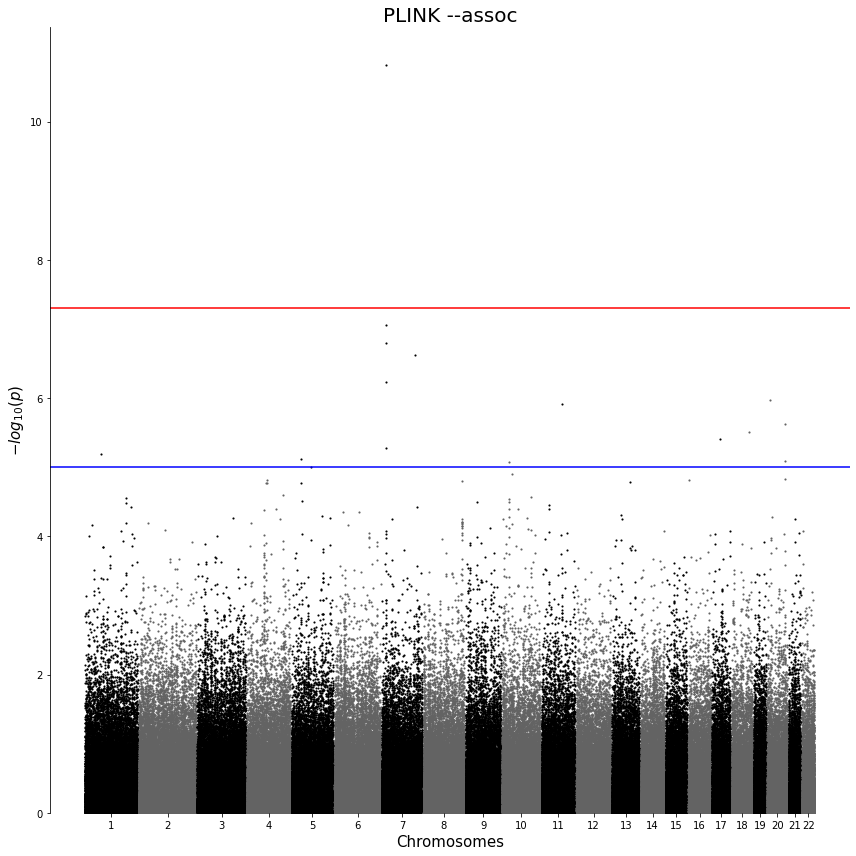

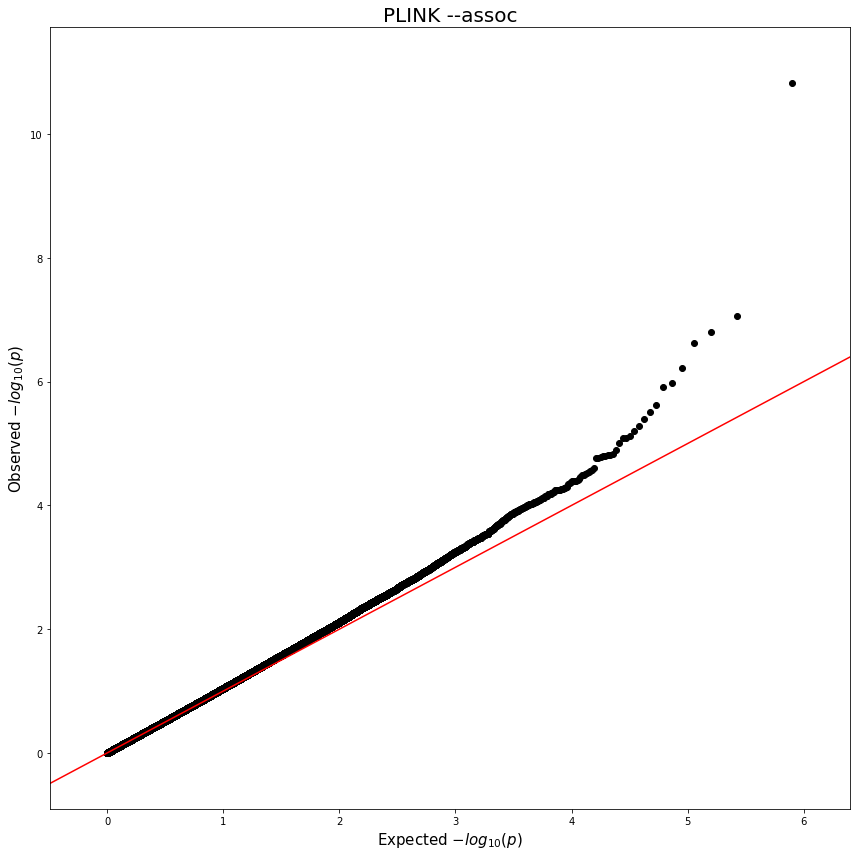

In [5]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=True, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=True, 
                title='PLINK --assoc')


#### Generate --assoc plots as subplot example

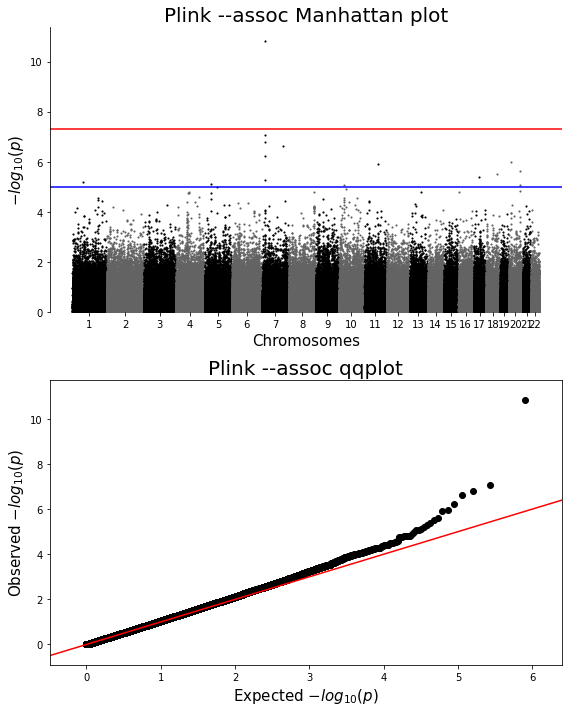

In [6]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_assoc, ax=axes[0], title="Plink --assoc Manhattan plot")
qqman.qqplot(gwas_file_assoc, ax=axes[1], title="Plink --assoc qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [7]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=False, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=False, 
                title='PLINK --assoc')

<br>  

## plot PLINK --logistic output

In [8]:
!head {gwas_file_logistic}

CHR SNP BP A1 TEST NMISS OR SE STAT P
1 rs12562034 768448 A ADD 3024 0.0256677 0.110171 0.0 0.8157999981570992
1 rs3934834 1005806 T ADD 3024 0.0459289 0.0955402 0.0 0.6307002454383797
1 rs9442372 1018704 G ADD 3024 0.110373 0.0694047 0.0 0.11180005057183699
1 rs6687776 1030565 T ADD 3024 0.19721 0.089995 0.0 0.028430205573239435
1 rs776599533 1031540 G ADD 3024 0.0573114 0.0776181 0.0 0.4603000266093733
1 rs4970405 1048955 G ADD 3024 0.13715 0.108973 0.0 0.2082001317508879
1 rs12726255 1049950 G ADD 3024 0.152721 0.0951169 0.0 0.10839992956224856
1 rs11807848 1061166 C ADD 3024 0.0487902 0.0693473 0.0 0.48170039229235834
1 rs9442373 1062638 A ADD 3024 -0.0109399 0.066566 0.0 0.8695000273511957


<br>

## <font color='blue'> *_NOTE: need to extract P-values from --logistic output --> pass to qqplot function_* </font>

reason for this is due to bug in the pypi qqman package:   

* error when parsing file 'TEST' column when tries to cast 'ADD' string to float  
* see error message below for details  



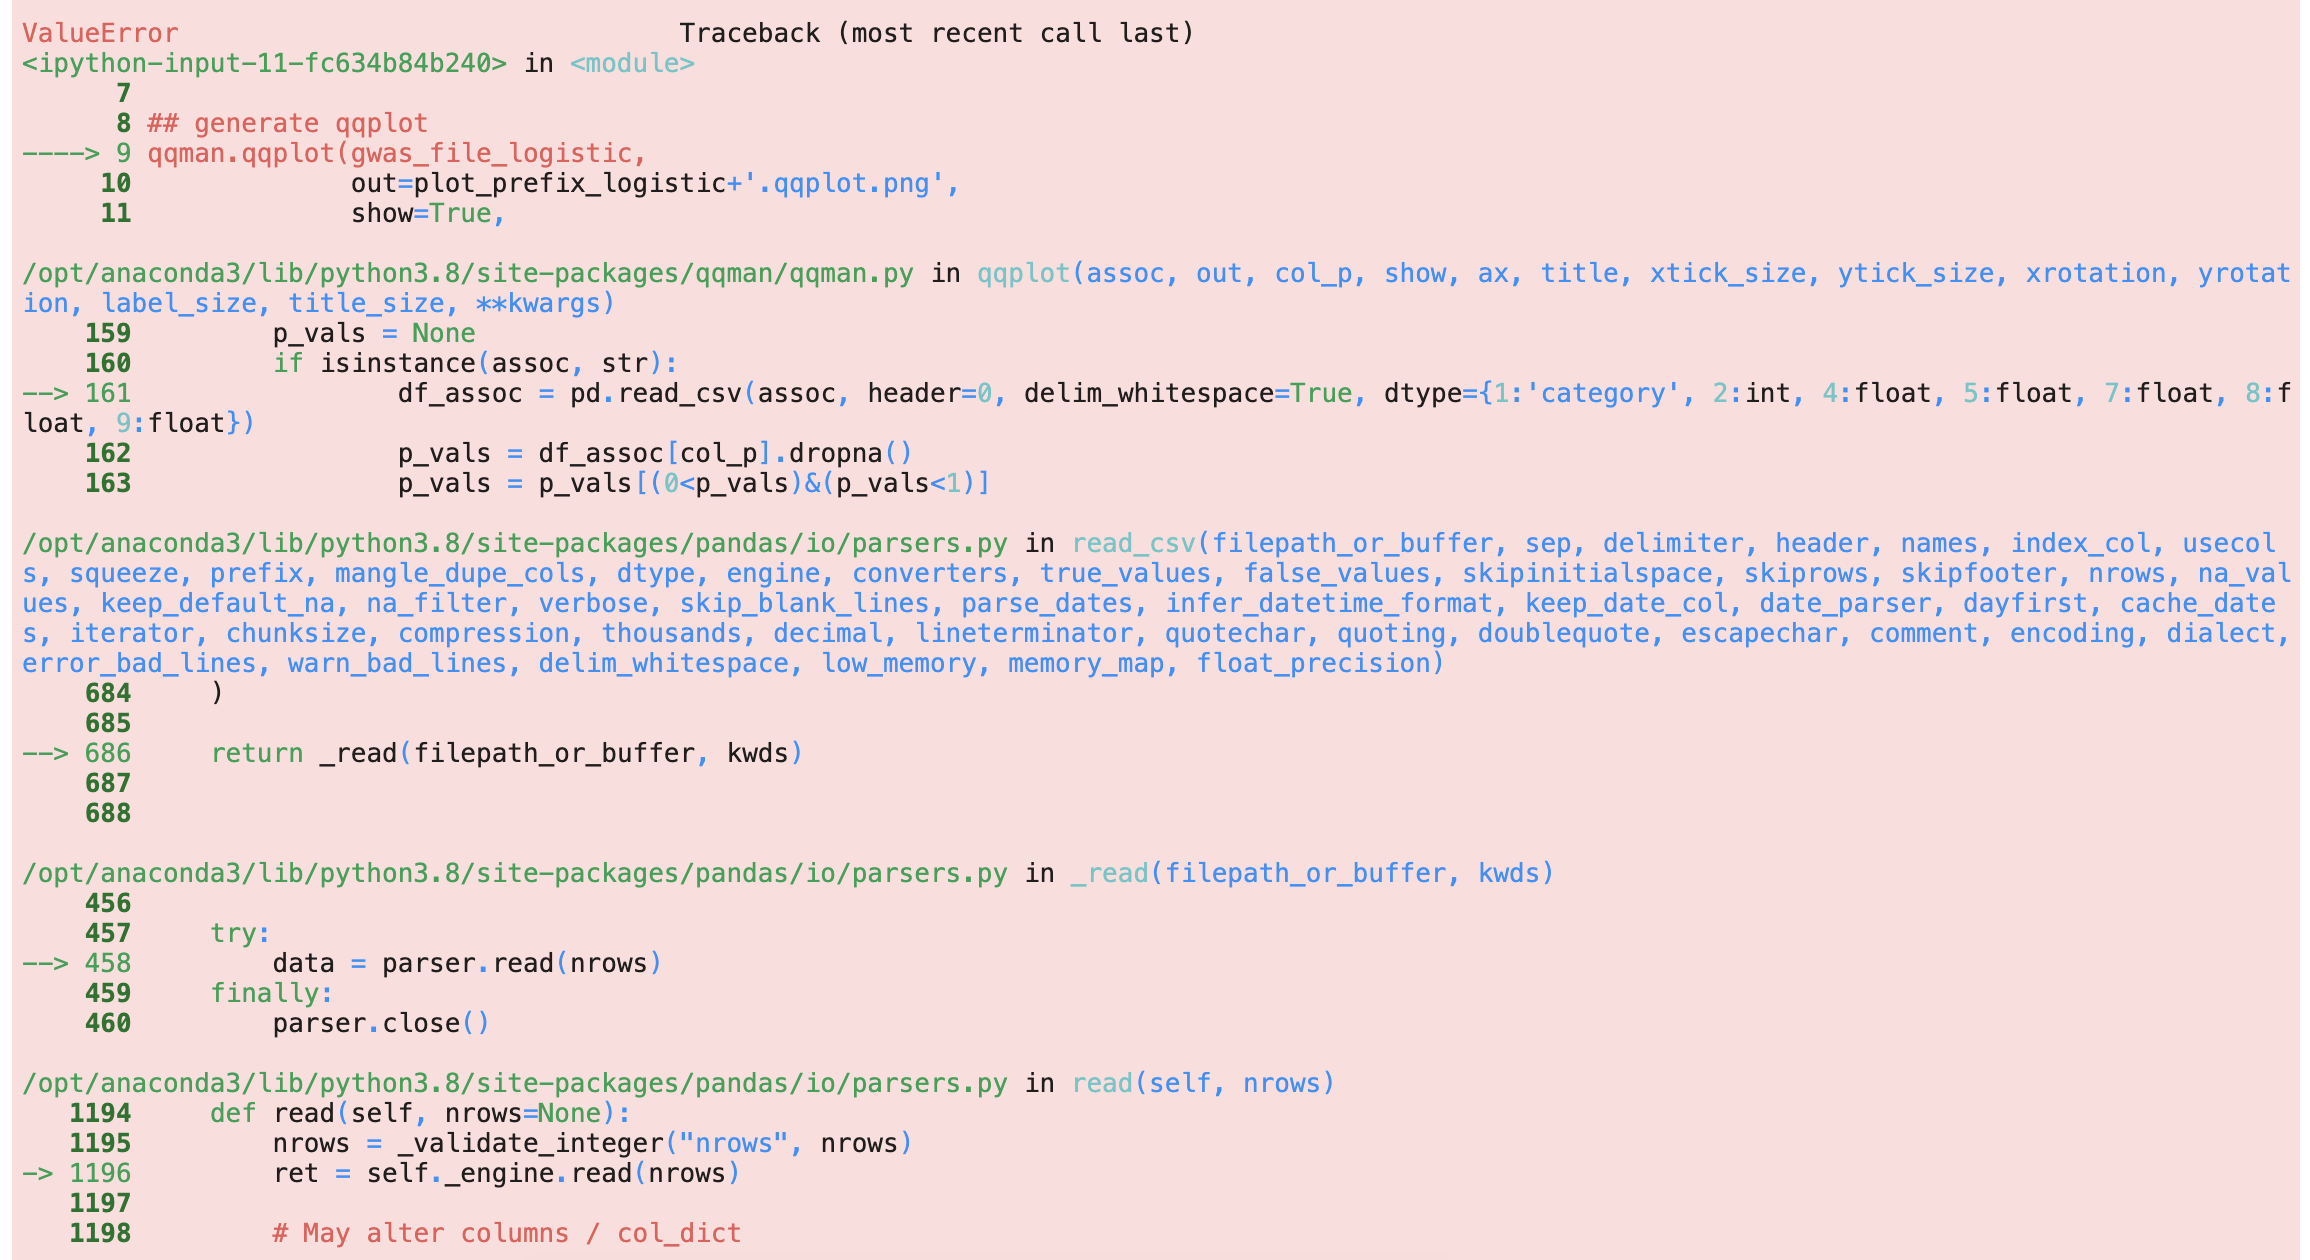  
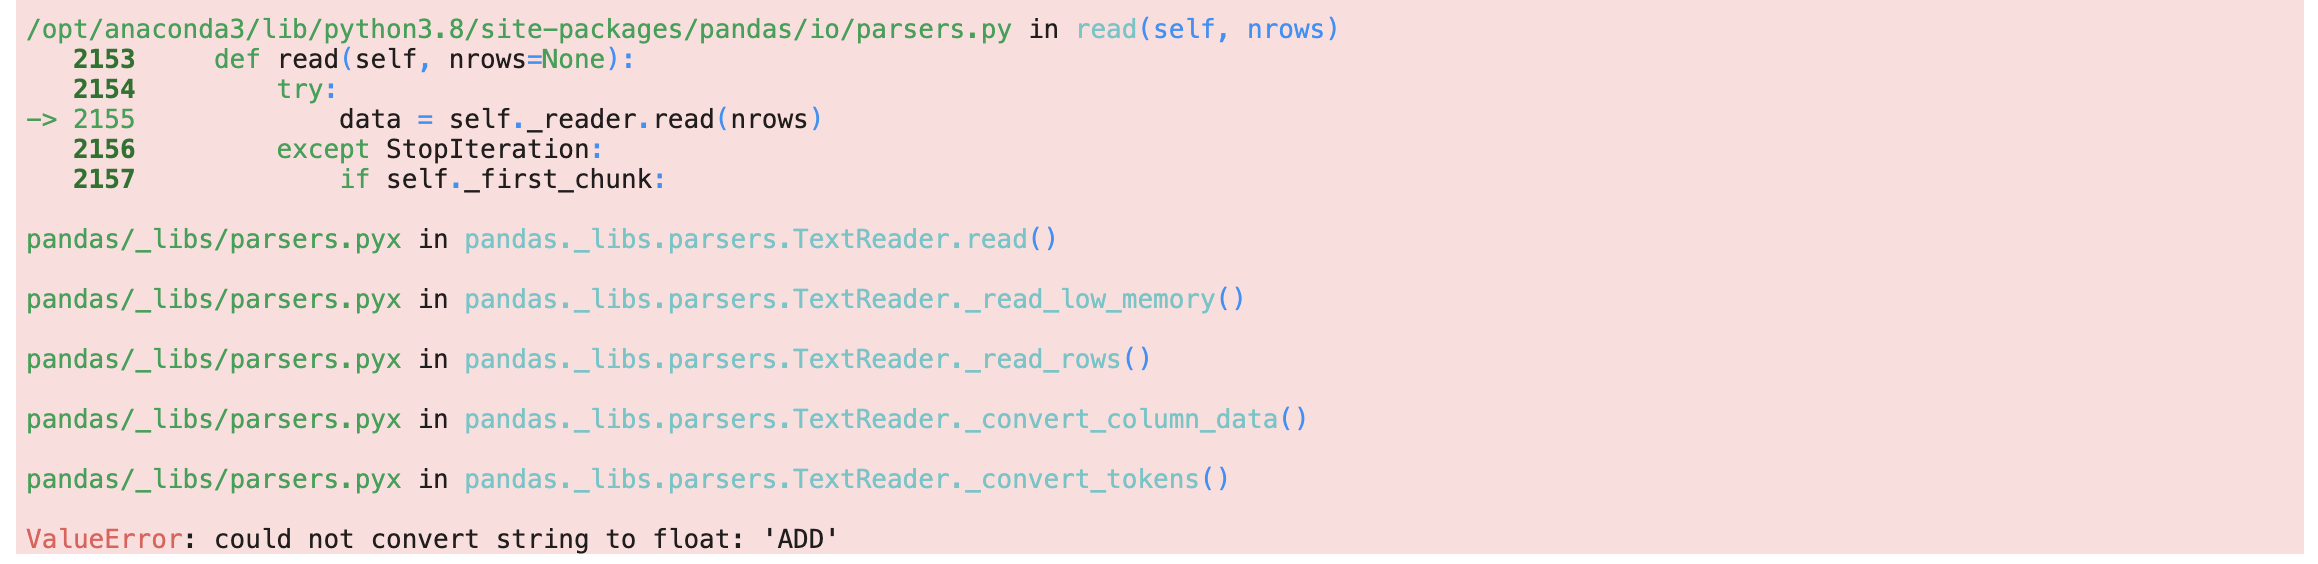

#### read in .assoc.logistic file --> Pandas DF & extract 'P' value column to list & delete DF

In [9]:
df = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df.head()

pval_logistic = list(df['P'])
del df

CHR          SNP       BP A1 TEST  NMISS        OR        SE  STAT        P
0    1   rs12562034   768448  A  ADD   3024  0.025668  0.110171   0.0  0.81580
1    1    rs3934834  1005806  T  ADD   3024  0.045929  0.095540   0.0  0.63070
2    1    rs9442372  1018704  G  ADD   3024  0.110373  0.069405   0.0  0.11180
3    1    rs6687776  1030565  T  ADD   3024  0.197210  0.089995   0.0  0.02843
4    1  rs776599533  1031540  G  ADD   3024  0.057311  0.077618   0.0  0.46030

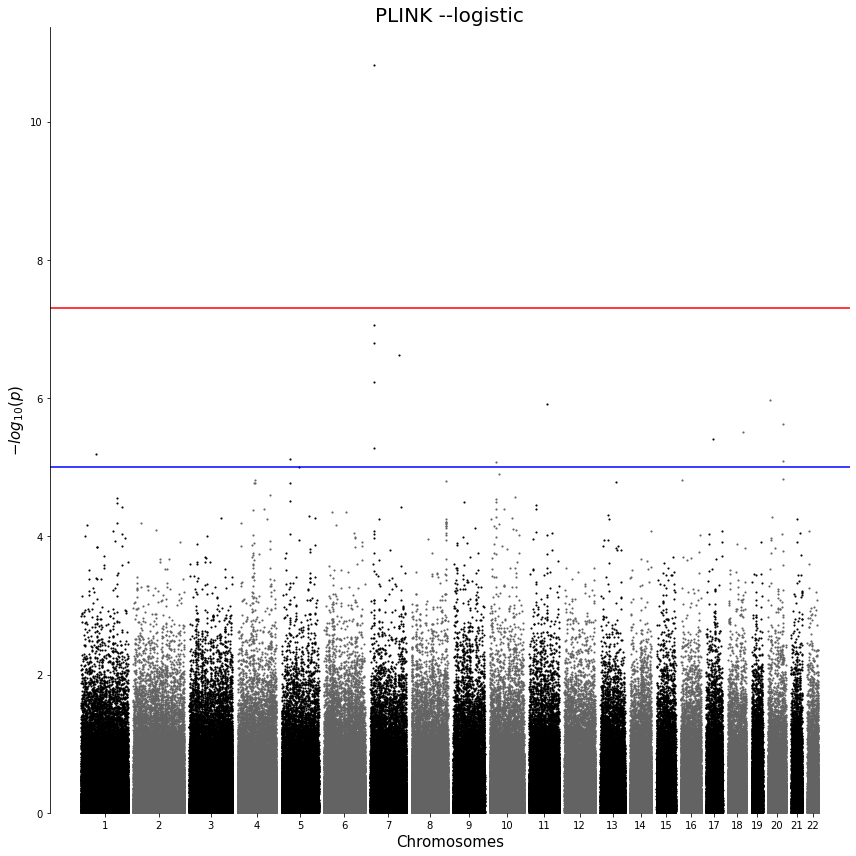

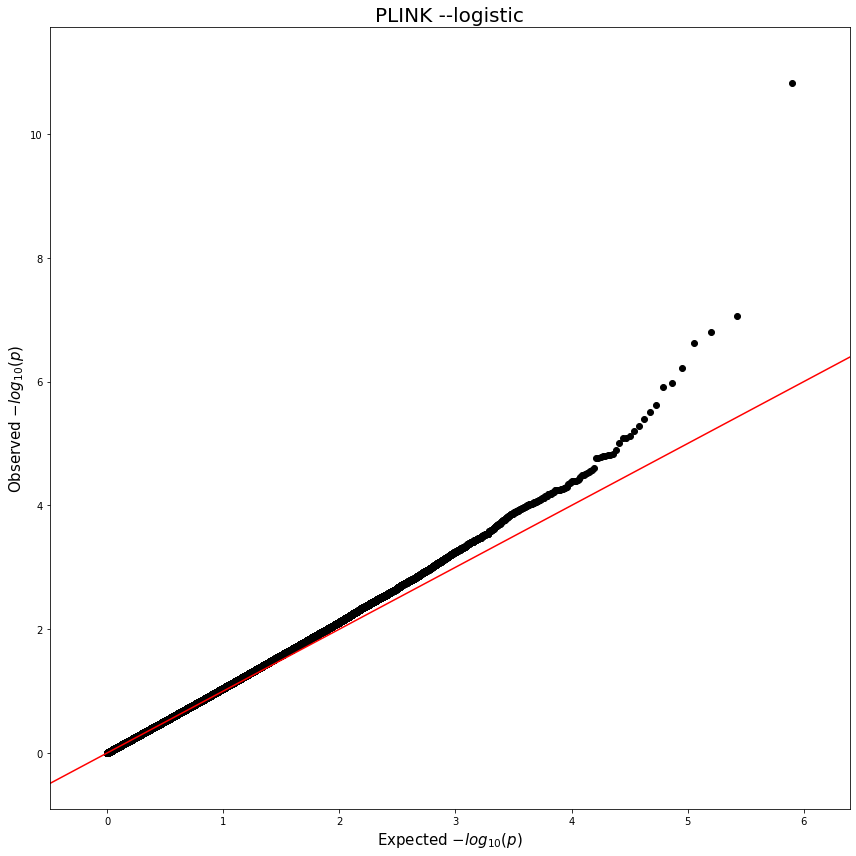

In [10]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=True, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=True, 
                title='PLINK --logistic')


#### Generate --logistic plots as subplot example

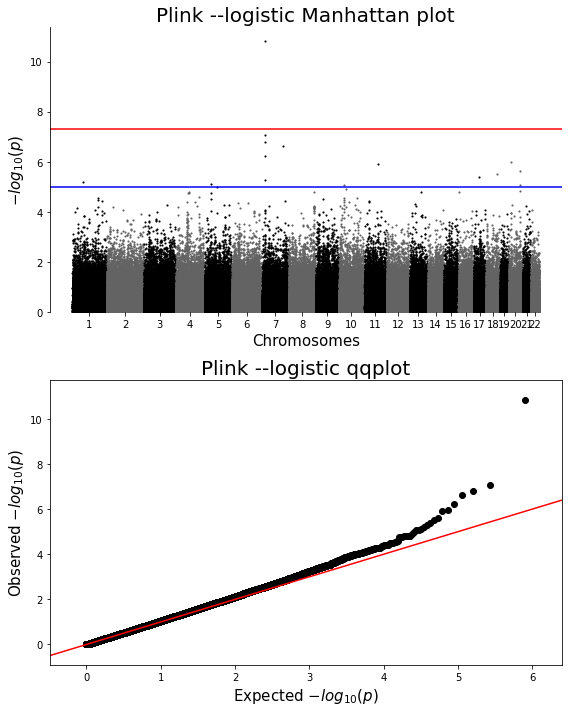

In [11]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, ax=axes[0], title="Plink --logistic Manhattan plot")
qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [12]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=False, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=False, 
                title='PLINK --logistic')

<br>  

## Example of how to format Manhattan plot

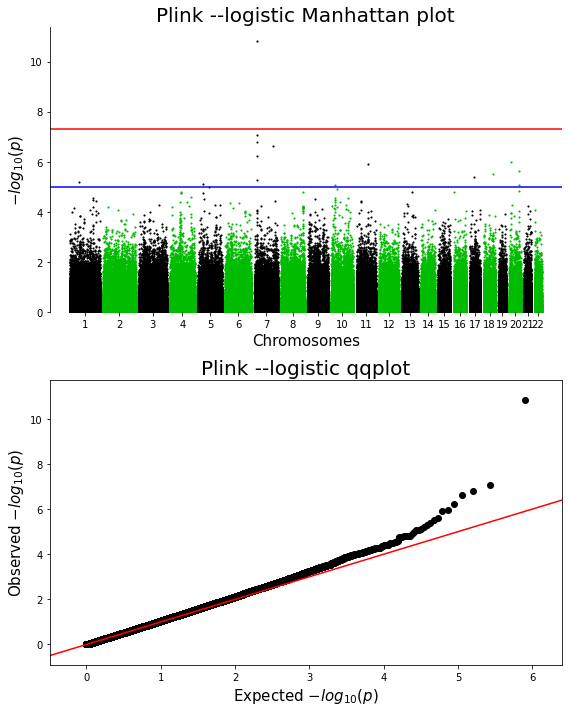

In [13]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, 
                ax=axes[0], 
                title="Plink --logistic Manhattan plot", 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()